##Pay Later Option
Pay Later Option은 투자자가 옵션을 행사할 때만 프리미엄을 지불하는 구조의 옵션입니다. 이 옵션은 옵션이 무효화될 경우 프리미엄을 지불할 필요가 없기 때문에 투자자에게 유리합니다. Pay Later Option은 보통 일반 옵션보다 높은 프리미엄을 갖습니다. 여기서는 간단한 Pay Later Call Option을 예로 들어 보겠습니다.

[*********************100%%**********************]  1 of 1 completed


Pay Later Option Price: -5.47


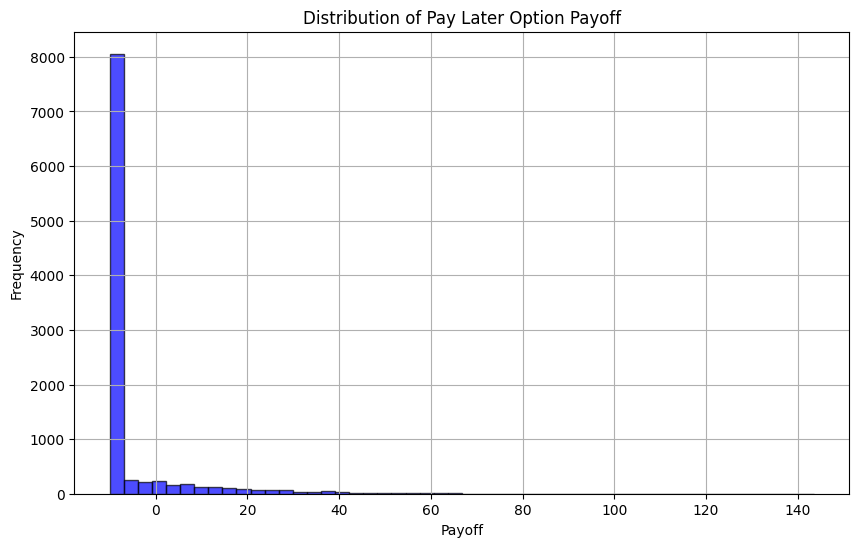

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격
    r: 무위험 이자율
    sigma: 변동성
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M)
    """
    dt = T / M
    paths = np.zeros((I, M + 1))
    paths[:, 0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return paths

def pay_later_option_payoff(paths, K, premium):
    """
    Pay Later 옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x M)
    K: 행사가격
    premium: 옵션 프리미엄

    Returns:
    Pay Later 옵션의 페이오프 배열
    """
    payoff = np.maximum(paths[:, -1] - K, 0) - premium
    return payoff

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
closing_prices = data['Close'].values

# Pay Later 옵션 파라미터 설정
S0 = closing_prices[0]  # 초기 주식 가격
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 단위)
I = 10000  # 시뮬레이션 수
K = 150  # 행사가격
premium = 10  # 옵션 프리미엄

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# Pay Later 옵션 페이오프 계산
pay_later_payoffs = pay_later_option_payoff(paths, K, premium)

# Pay Later 옵션 가격 계산 (할인된 페이오프 평균)
pay_later_price = np.exp(-r * T) * np.mean(pay_later_payoffs)
print(f"Pay Later Option Price: {pay_later_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(pay_later_payoffs, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Pay Later Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
